In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [107]:
#from pandas_datareader.data import DataReader
#import yfinance as yf
#from pandas_datareader import data as pdr
import pandas as pd

# Load each company's data
tsla = pd.read_csv("APPLE_dataset.csv")
aapl = pd.read_csv("META_dataset.csv")
meta = pd.read_csv("Nvidia_dataset.csv")
nvda = pd.read_csv("TESLA_dataset.csv")



In [108]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Your Alpha Vantage API key (replace with your key)
api_key = "KGU1PO24KHUR9BIH"

# Initialize TimeSeries API
ts = TimeSeries(key=api_key, output_format='pandas')

# Example: Reliance Industries listed on BSE (use .BSE) or NSE (sometimes available as .NSE)
symbol = "META"

# Fetch full historical daily data
data, meta = ts.get_daily(symbol=symbol, outputsize='full')

# Save to CSV
data.to_csv("META_dataset.csv")

print("✅ Data fetched successfully")
print(data.head())


✅ Data fetched successfully
            1. open   2. high    3. low  4. close   5. volume
date                                                         
2025-08-26  750.800  754.8700  747.9400    754.10   7601800.0
2025-08-25  754.820  758.8800  750.1300    753.30   6861158.0
2025-08-22  739.230  756.9000  734.3900    754.79  10612667.0
2025-08-21  744.705  745.5000  733.1101    739.10   8876307.0
2025-08-20  747.570  750.1999  731.0000    747.72  11898190.0


In [109]:
company_list = ['TESLA', 'APPLE', 'NVIDIA', 'META']
company_name = ['TSLA', 'AAPL', 'NVDA', 'META']

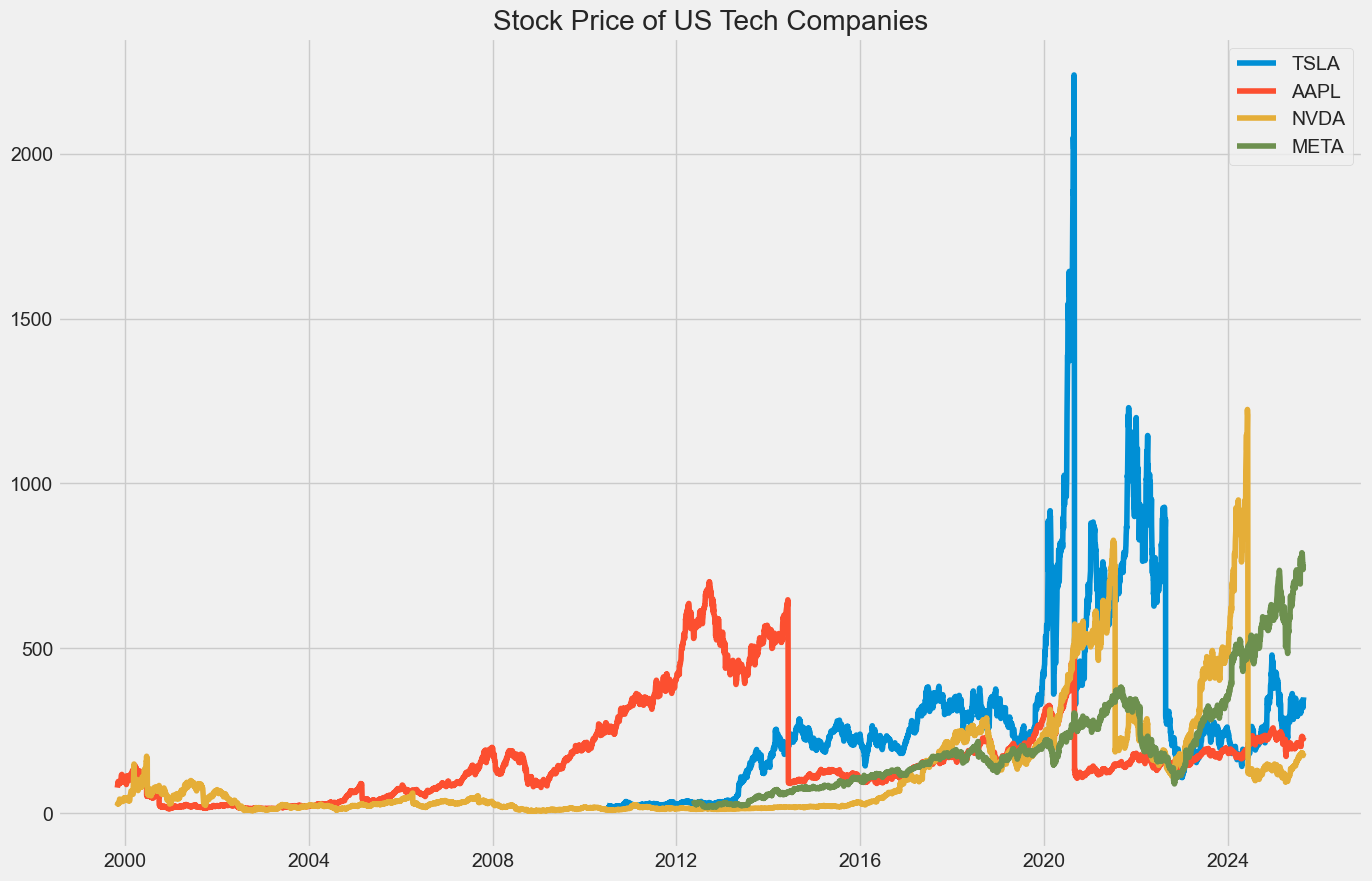

In [110]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Your Alpha Vantage API key
api_key = "KGU1PO24KHUR9BIH"

# Initialize Alpha Vantage TimeSeries API
ts = TimeSeries(key=api_key, output_format='pandas')

# Step 1: Define company tickers
company_names = ['TSLA', 'AAPL', 'NVDA', 'META']  # Tesla, Apple, Nvidia, Meta

# Step 2: Download data and store DataFrames in a list
dataframes = []
for com_name in company_names:
    data, meta = ts.get_daily(symbol=com_name, outputsize='full')
    data["Company"] = com_name
    dataframes.append(data)

# Step 3: Concatenate into one DataFrame
final_df = pd.concat(dataframes, axis=0)

# Step 4: Plot closing prices
plt.figure(figsize=(15, 10))
plt.title("Stock Price of US Tech Companies")

for com_name in company_names:
    plt.plot(final_df.loc[final_df["Company"] == com_name].index,
             final_df.loc[final_df["Company"] == com_name]["4. close"],
             label=com_name)

plt.legend()
plt.show()





ValueError: We have detected your API key as KGU1PO24KHUR9BIH and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Your API key here
api_key = "YOUR_API_KEY"

# Initialize Alpha Vantage
ts = TimeSeries(key=api_key, output_format='pandas')

# Tech company tickers
tech_list = ['TSLA', 'AAPL', 'NVDA', 'META']

company_data = {}

# Fetch stock data for each company
for ticker in tech_list:
    data, meta = ts.get_daily(symbol=ticker, outputsize='full')
    data.index = pd.to_datetime(data.index)   # ensure datetime index
    data = data.sort_index()                  # ensure chronological order
    
    # Rename '4. close' to 'Adj Close' (to match your rolling mean code)
    data.rename(columns={'4. close': 'Adj Close'}, inplace=True)
    
    company_data[ticker] = data

# Moving averages
ma_day = [10, 20, 50]

for ma in ma_day:
    for ticker, df in company_data.items():
        column_name = f"MA for {ma} days"
        df[column_name] = df['Adj Close'].rolling(ma).mean()

# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

company_names = {
    'TSLA': "TESLA",
    'AAPL': "APPLE",
    'NVDA': "NVIDIA",
    'META': "META"
}

# Plot each company
for ax, ticker in zip(axes.flatten(), tech_list):
    df = company_data[ticker]
    df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(company_names[ticker])

fig.tight_layout()
plt.show()


ValueError: We have detected your API key as YOUR_API_KEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

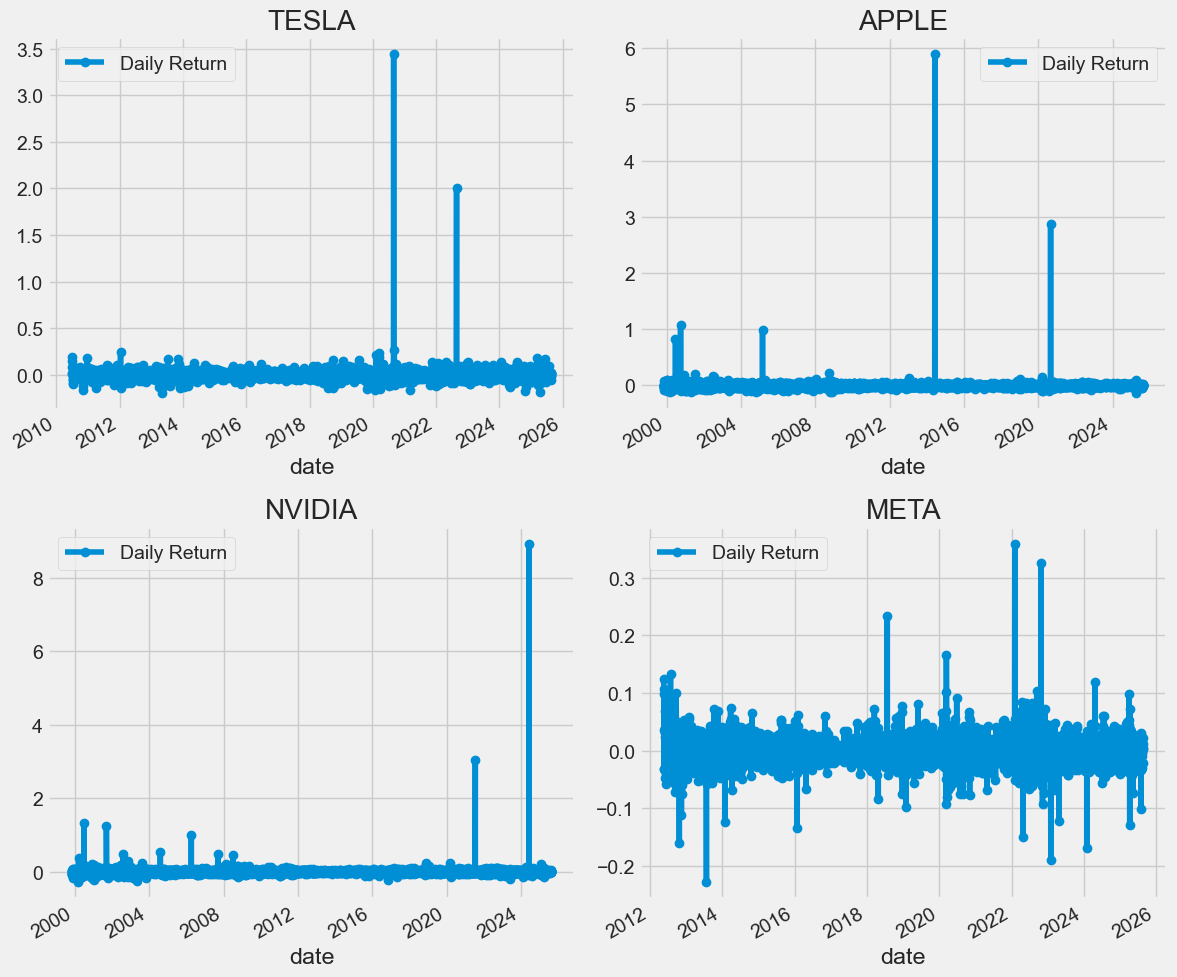

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Your Alpha Vantage API key
api_key = "KGU1PO24KHUR9BIH"

# Initialize Alpha Vantage TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')

# Company tickers
tech_list = ['TSLA', 'AAPL', 'NVDA', 'META']

# Download stock data from Alpha Vantage
company_list = []
for ticker in tech_list:
    data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
    data = data.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Adj Close",   # Using close as Adj Close
        "5. volume": "Volume"
    })
    data.index = pd.to_datetime(data.index)
    company_list.append(data)

# -------------------------
# Calculate Daily Returns
# -------------------------
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# -------------------------
# Plot Daily Returns
# -------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

company_list[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('TESLA')

company_list[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('APPLE')

company_list[2]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('NVIDIA')

company_list[3]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('META')

plt.tight_layout()
plt.show()


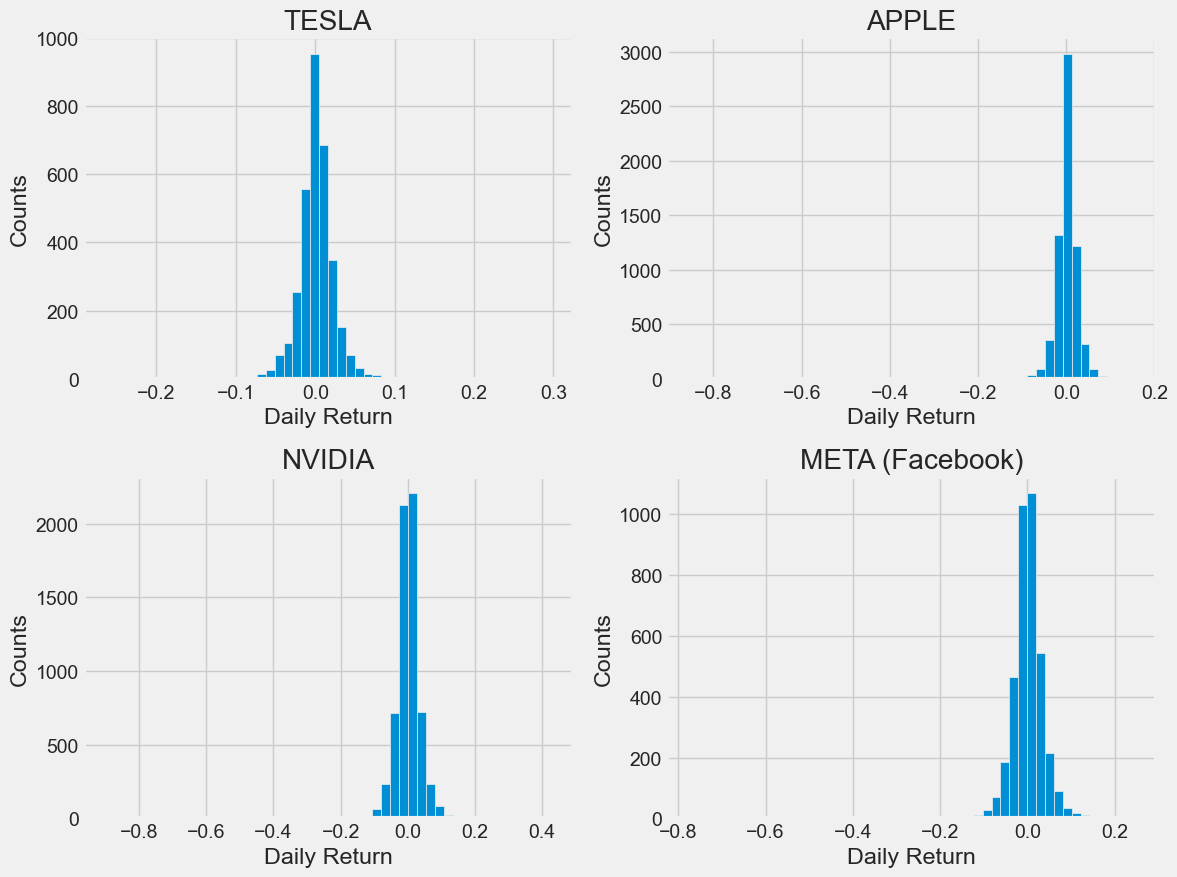

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# Alpha Vantage API key
api_key = "KGU1PO24KHUR9BIH"

# Company tickers (US Stocks on Alpha Vantage use plain tickers)
tech_list = ['TSLA', 'AAPL', 'NVDA', 'META']

# Initialize Alpha Vantage TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')

# Download stock data
company_list = {}
for ticker in tech_list:
    data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
    data = data.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Adj Close',
        '5. volume': 'Volume'
    })
    data.index = pd.to_datetime(data.index)
    data = data.sort_index()  # sort by date
    data['Daily Return'] = data['Adj Close'].pct_change()
    company_list[ticker] = data

# -------------------------
# Plot Daily Return Histogram
# -------------------------
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 4)
company_list['TSLA']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('META (Facebook)')

plt.subplot(2, 2, 2)
company_list['AAPL']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('APPLE')

plt.subplot(2, 2, 3)
company_list['NVDA']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('NVIDIA')

plt.subplot(2, 2, 1)
company_list['META']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('TESLA')

plt.tight_layout()
plt.show()


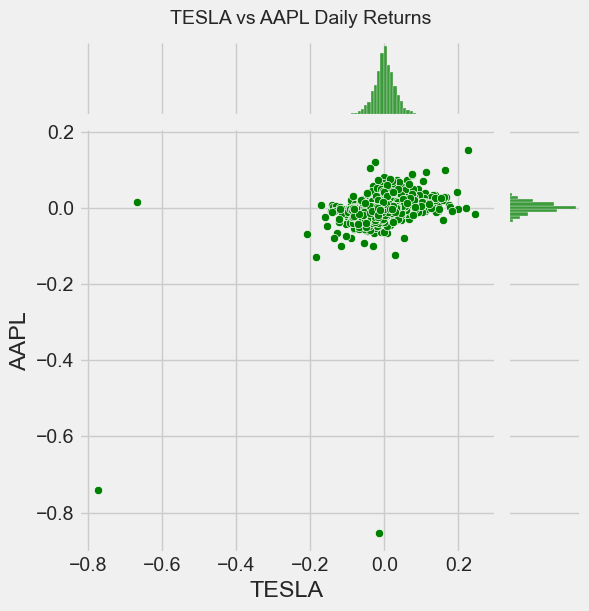

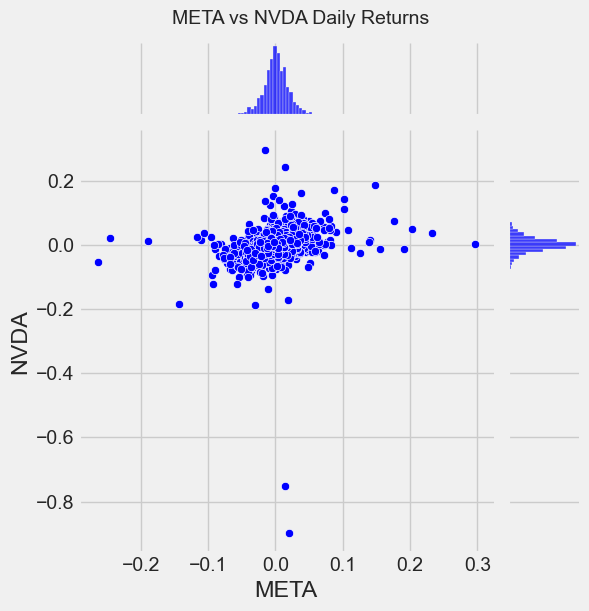

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSVs (adjust paths to your files)
tesla = pd.read_csv("TESLA_dataset.csv", parse_dates=["date"], index_col="date")
apple = pd.read_csv("APPLE_dataset.csv", parse_dates=["date"], index_col="date")
meta = pd.read_csv("META_dataset.csv", parse_dates=["date"], index_col="date")
nvidia = pd.read_csv("Nvidia_dataset.csv", parse_dates=["date"], index_col="date")

# Rename '4. close' to ticker names
tesla = tesla.rename(columns={"4. close": "TESLA"})
apple = apple.rename(columns={"4. close": "AAPL"})
meta = meta.rename(columns={"4. close": "META"})
nvidia = nvidia.rename(columns={"4. close": "NVDA"})

# Combine into one DataFrame with only closing prices
close_prices = pd.concat([tesla["TESLA"], apple["AAPL"], meta["META"], nvidia["NVDA"]], axis=1)

# Calculate daily returns
tech_rets = close_prices.pct_change().dropna()

# Example: Tesla vs Apple daily returns
sns.jointplot(x="TESLA", y="AAPL", data=tech_rets, kind="scatter", color="green")
plt.suptitle("TESLA vs AAPL Daily Returns", y=1.02, fontsize=14)
plt.show()

# Example: Meta vs Nvidia daily returns
sns.jointplot(x="META", y="NVDA", data=tech_rets, kind="scatter", color="blue")
plt.suptitle("META vs NVDA Daily Returns", y=1.02, fontsize=14)
plt.show()


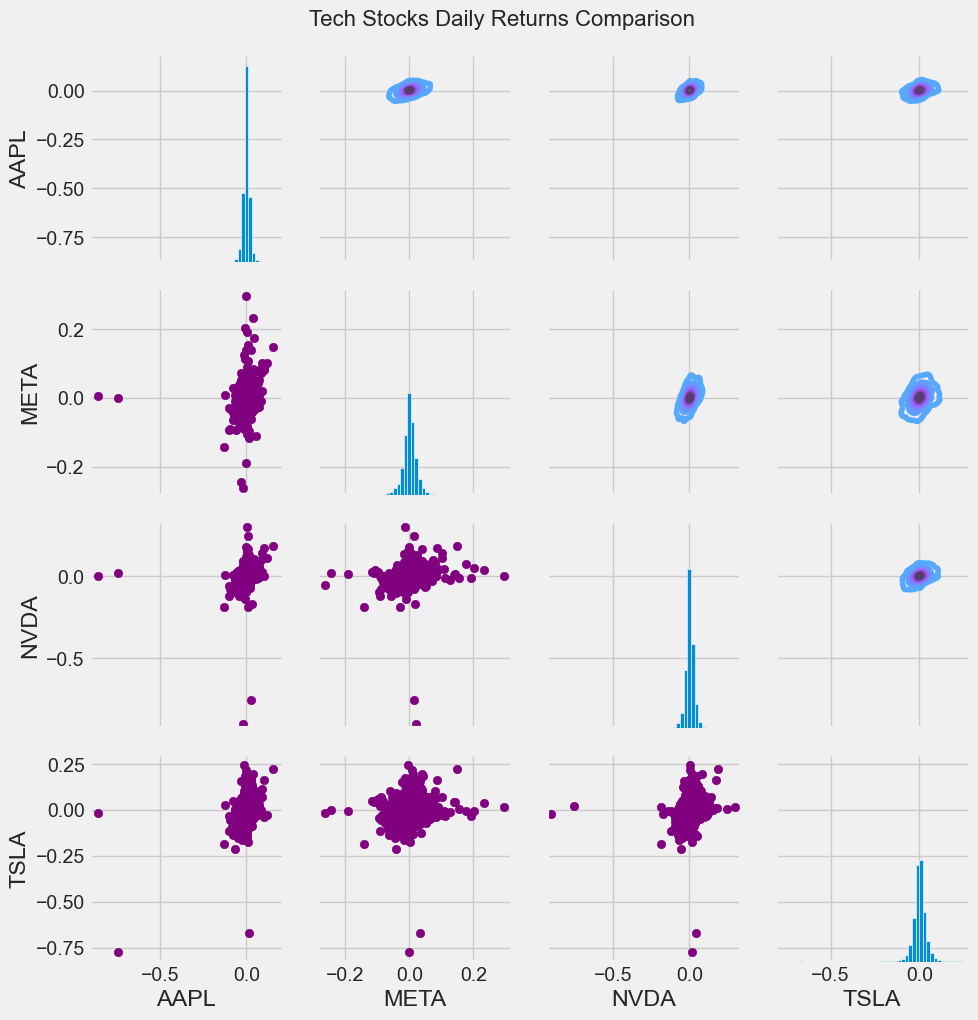

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
apple = pd.read_csv("APPLE_dataset.csv", parse_dates=["date"], index_col="date")
meta = pd.read_csv("META_dataset.csv", parse_dates=["date"], index_col="date")
nvidia = pd.read_csv("Nvidia_dataset.csv", parse_dates=["date"], index_col="date")
tesla = pd.read_csv("TESLA_dataset.csv", parse_dates=["date"], index_col="date")

# Rename '4. close' column to ticker names
apple = apple.rename(columns={"4. close": "AAPL"})
meta = meta.rename(columns={"4. close": "META"})
nvidia = nvidia.rename(columns={"4. close": "NVDA"})
tesla = tesla.rename(columns={"4. close": "TSLA"})

# Combine all closing prices into one DataFrame
close_prices = pd.concat([apple["AAPL"], meta["META"], nvidia["NVDA"], tesla["TSLA"]], axis=1)

# Calculate daily returns
tech_rets = close_prices.pct_change()

# Drop NA for clean plotting
tech_rets = tech_rets.dropna()

# PairGrid plot
return_fig = sns.PairGrid(tech_rets)

# Lower triangle → scatter plots
return_fig.map_lower(plt.scatter, color='purple')

# Upper triangle → KDE plots
return_fig.map_upper(sns.kdeplot, cmap='cool_d')

# Diagonal → histograms
return_fig.map_diag(plt.hist, bins=50)

plt.suptitle("Tech Stocks Daily Returns Comparison", y=1.02, fontsize=16)
plt.show()


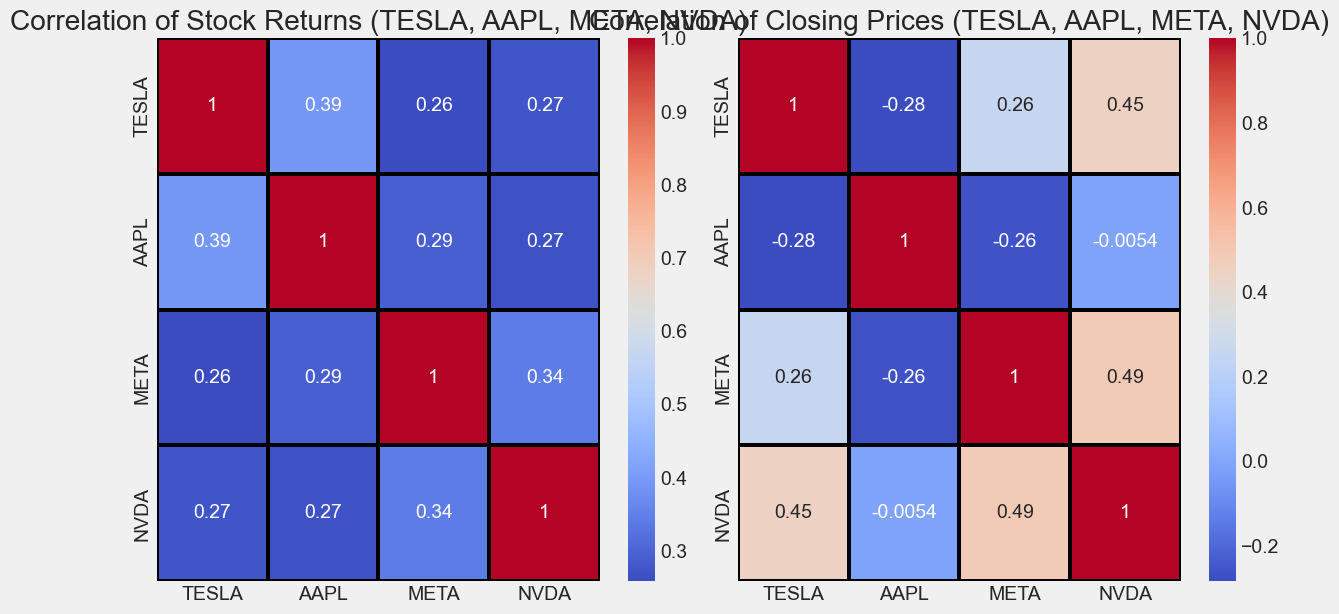

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine closing prices into one DataFrame (done earlier as `close_prices`)
closing_df = close_prices  

# Compute correlations
rets_corr = tech_rets.corr()       # correlation of daily returns
price_corr = closing_df.corr()     # correlation of closing prices

# Plot heatmaps
plt.figure(figsize=(12, 12))

# Heatmap for stock returns
plt.subplot(2, 2, 1)
sns.heatmap(rets_corr, annot=True, cmap='coolwarm', linewidths=1.5, linecolor='black')
plt.title('Correlation of Stock Returns (TESLA, AAPL, META, NVDA)')

# Heatmap for closing prices
plt.subplot(2, 2, 2)
sns.heatmap(price_corr, annot=True, cmap='coolwarm', linewidths=1.5, linecolor='black')
plt.title('Correlation of Closing Prices (TESLA, AAPL, META, NVDA)')

plt.tight_layout()
plt.show()


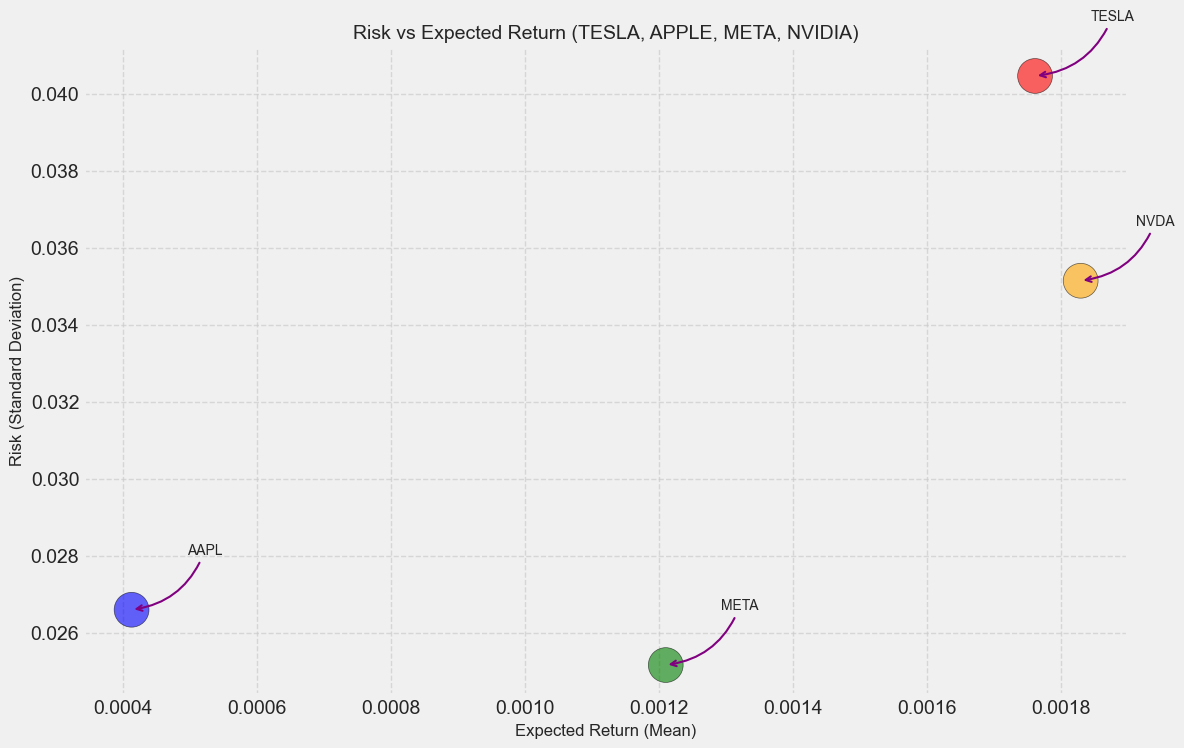

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 200  

plt.figure(figsize=(12, 8))
plt.scatter(rets.mean(), rets.std(), 
            s=area, alpha=0.6, 
            c=['red', 'blue', 'green', 'orange'], 
            edgecolors='black')

plt.xlabel('Expected Return (Mean)', fontsize=12)
plt.ylabel('Risk (Standard Deviation)', fontsize=12)
plt.title('Risk vs Expected Return (TESLA, APPLE, META, NVIDIA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each company
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
                 xy=(x, y), 
                 xytext=(40, 40), 
                 textcoords='offset points',
                 fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='purple', lw=1.5, connectionstyle='arc3,rad=-0.3'))

plt.show()


In [ ]:
from alpha_vantage.timeseries import TimeSeries

# Initialize Alpha Vantage (replace 'YOUR_API_KEY' with your actual key)
ts = TimeSeries(key='KGU1PO24KHUR9BIH', output_format='pandas')

# Get the stock quote (Daily data for ADBE)
df, meta_data = ts.get_daily(symbol='ADBE', outputsize='full')

# Rename columns to match Yahoo Finance style
df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Show the data
df.head()


,Open,High,Low,Close,Volume
date,,,,,
2025-08-25,362.560,364.65,361.40,363.21,2259516.0
2025-08-22,355.800,362.65,354.00,362.09,3058636.0
2025-08-21,349.910,353.82,347.00,353.43,2363230.0
2025-08-20,361.680,363.00,353.20,353.43,3727897.0
2025-08-19,359.215,364.24,358.12,361.03,2808040.0


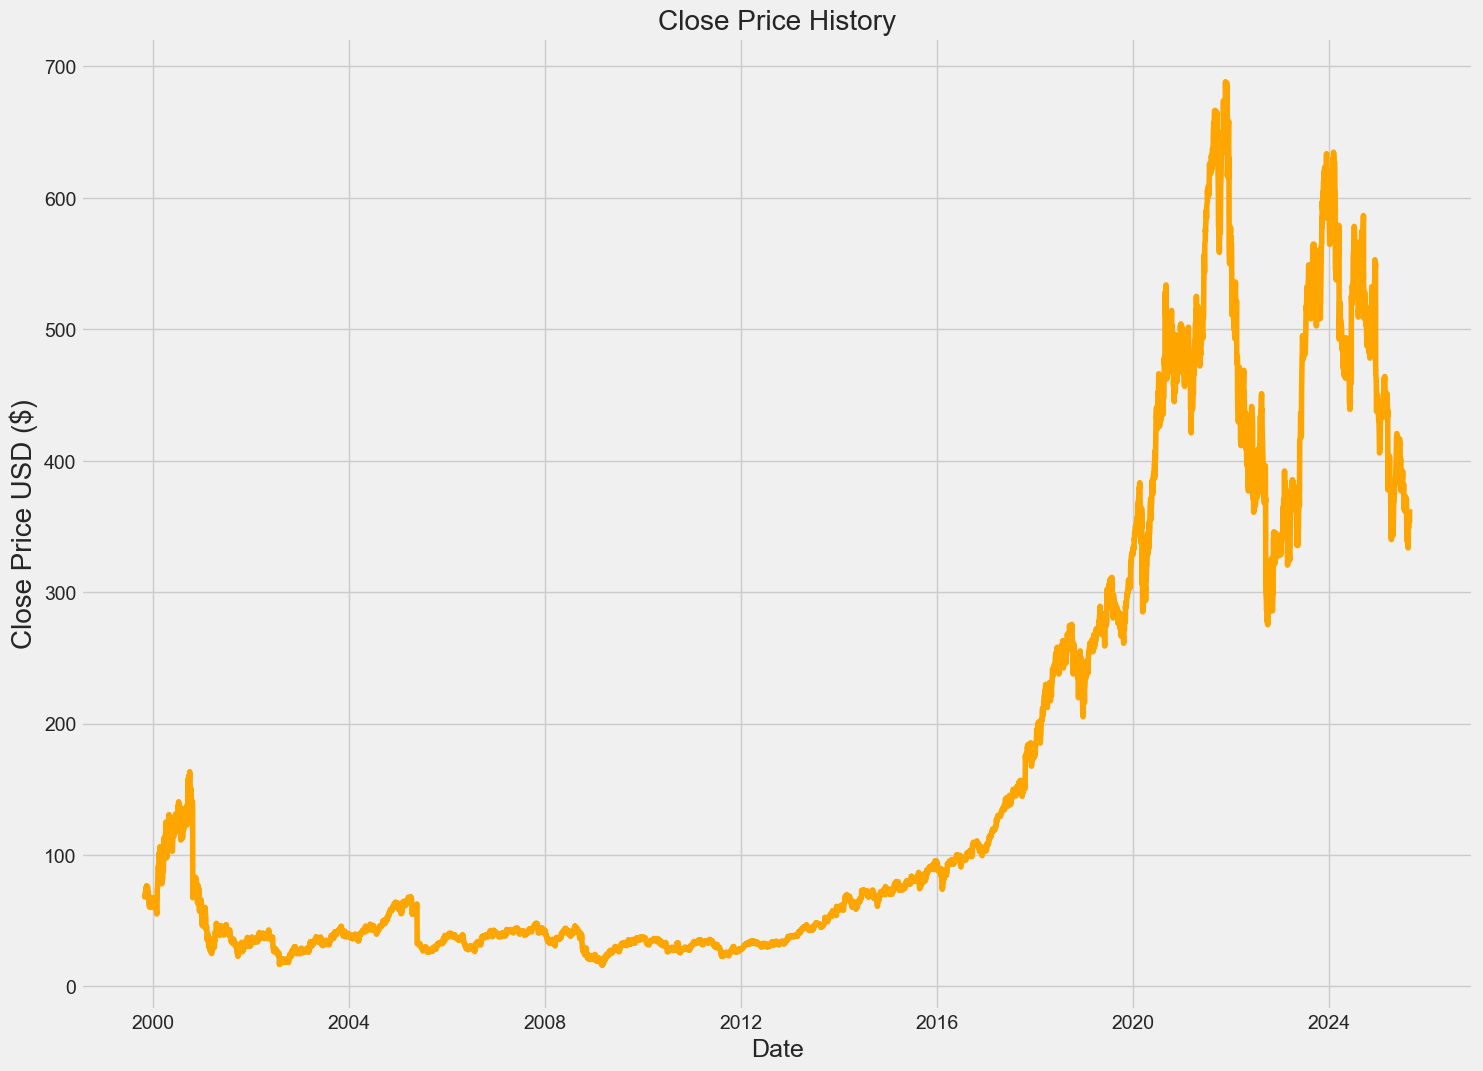

In [ ]:
plt.figure(figsize=(16, 12))
plt.title('Close Price History')

# Sort index so the timeline is left → right
df.sort_index(inplace=True)

plt.plot(df.index, df['Close'], color='orange')  # added color for clarity
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()


In [ ]:
# Ensure data is in chronological order
df.sort_index(inplace=True)

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (95% of data)
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len


6169

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07819866],
       [0.07745505],
       [0.07857047],
       ...,
       [0.50186648],
       [0.51474591],
       [0.51641161]], shape=(6493, 1))

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    # The append() function in Python is used to add elements to the end of a list
    x_train.append(train_data[i-60:i, 0])   # previous 60 days
    y_train.append(train_data[i, 0])        # target is the next day
    
    if i <= 61:  # just to see the first two iterations
        print("x_train sample:\n", x_train)
        print("y_train sample:\n", y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data into 3D [samples, time_steps, features] as required by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train sample:
 [array([0.07819866, 0.07745505, 0.07857047, 0.07867458, 0.08136647,
       0.08239266, 0.08331474, 0.08480198, 0.08396913, 0.08796978,
       0.08600663, 0.09009652, 0.08777644, 0.08945701, 0.0887134 ,
       0.08935291, 0.08740463, 0.08786567, 0.08600663, 0.08266036,
       0.078392  , 0.0752242 , 0.07830277, 0.07541754, 0.07012299,
       0.06640491, 0.07699401, 0.07364773, 0.06937938, 0.06575053,
       0.06640491, 0.06826395, 0.07104508, 0.0766222 , 0.07327593,
       0.0704948 , 0.07570011, 0.07587858, 0.07253231, 0.07458469,
       0.07430212, 0.07439135, 0.07625039, 0.07373697, 0.06555719,
       0.06714853, 0.06807061, 0.07253231, 0.07625039, 0.06937938,
       0.06890346, 0.07384107, 0.07485239, 0.07141689, 0.07012299,
       0.07113431, 0.06975119, 0.06630081, 0.06992965, 0.06723776])]
y_train sample:
 [np.float64(0.06946861196626958)]

x_train sample:
 [array([0.07819866, 0.07745505, 0.07857047, 0.07867458, 0.08136647,
       0.08239266, 0.08331474, 0.084801

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\asus\OneDrive\Desktop\DATA ANALYST\Stock_analysis\new_env_311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6109/6109 ━━━━━━━━━━━━━━━━━━━━ 238s 38ms/step - loss: 7.8579e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index training_data_len-60 to end
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]   # actual closing prices

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data into 3D [samples, timesteps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo scaling (get back to original prices)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


np.float64(19.907082913260282)

C:\Users\asus\AppData\Local\Temp\ipykernel_28068\3938404017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


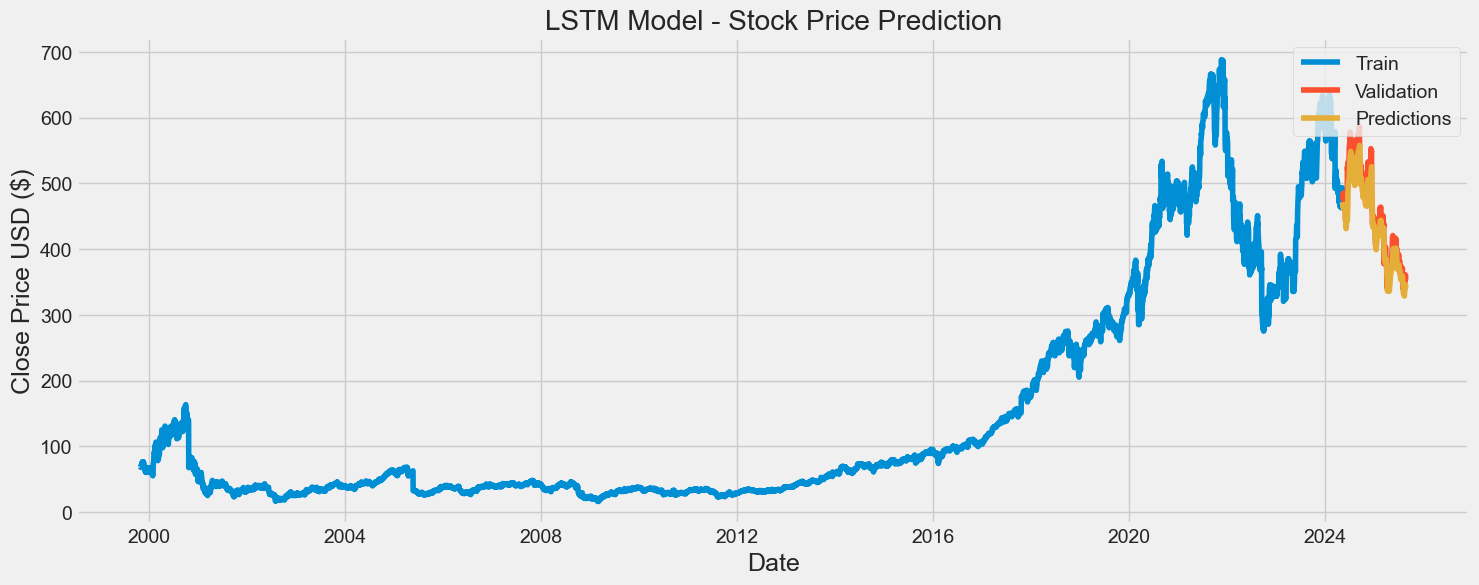

In [ ]:
# Split into train and validation
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the results
plt.figure(figsize=(16,6))
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot train data
plt.plot(train['Close'])

# Plot validation data (actual vs predictions)
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Validation', 'Predictions'], loc='upper right')
plt.show()


In [ ]:
# Initialize Alpha Vantage TimeSeries (replace 'YOUR_API_KEY' with your key)
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')

# Get the stock quote (Daily data for PFE)
df, meta_data = ts.get_daily(symbol='PFE', outputsize='full')

# Show the first few rows
df.head()


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-08-25,25.88,25.890,25.11,25.14,32684212.0
2025-08-22,25.90,26.110,25.76,25.88,34560471.0
2025-08-21,25.41,25.885,25.37,25.74,37068082.0
2025-08-20,25.39,25.690,25.34,25.38,38111023.0
2025-08-19,25.14,25.430,25.10,25.32,29170504.0


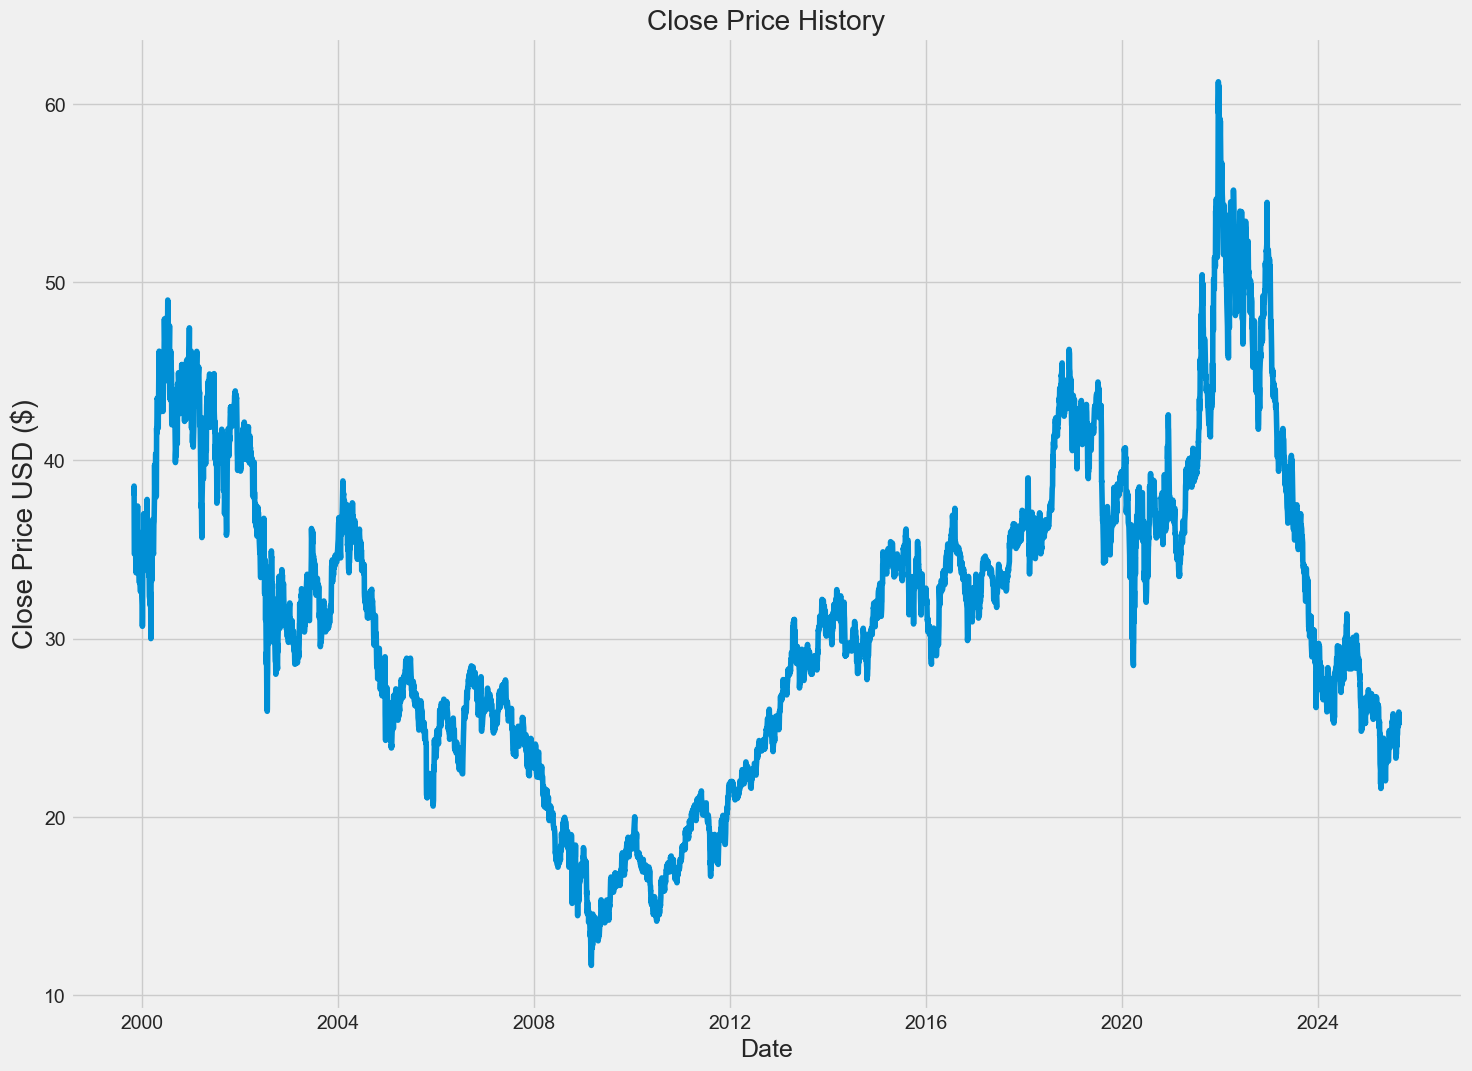

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Close Price History')
plt.plot(df['4. close'])  # use '4. close' instead of 'Close'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()


In [ ]:
# Using your validation data
actual = valid['4. close'].values
predicted = valid['Predictions'].values

# Compute percentage difference
diff = np.abs(predicted - actual) / actual

# Compute percentage accuracy
accuracy = 100 * (1 - np.mean(diff))
print(f"Model Accuracy: {accuracy:.3f}%")


Model Accuracy: 97.596%


In [ ]:
# Create a new dataframe with only the '4. close' column
data = df.filter(['4. close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len


6169

In [ ]:
# Scale the '4. close' data to range (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Show the scaled data
scaled_data


array([[0.271829  ],
       [0.28675136],
       [0.28392821],
       ...,
       [0.54244807],
       [0.53357532],
       [0.54123815]], shape=(6493, 1))

In [ ]:
# Create the training data set from the scaled data
train_data = scaled_data[0:int(training_data_len), :]

# Initialize x_train and y_train
x_train = []
y_train = []

# Create x_train and y_train datasets
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 previous days as input
    y_train.append(train_data[i, 0])       # Current day as output
    
    # Optional: print first two steps for verification
    if i <= 61:
        print("x_train sample:", x_train[-1])
        print("y_train sample:", y_train[-1])
        print()

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check shape
x_train.shape


x_train sample: [0.271829   0.28675136 0.28392821 0.27666868 0.27545876 0.27041742
 0.271829   0.27122404 0.2722323  0.26194797 0.2605364  0.2605364
 0.25347852 0.24742892 0.26396451 0.23936277 0.23855616 0.23452309
 0.24500907 0.2548901  0.25509175 0.26477112 0.27606372 0.27626538
 0.271829   0.25408348 0.25831821 0.2605364  0.26114136 0.26114136
 0.27606372 0.28211333 0.28473483 0.28029845 0.28150837 0.27384553
 0.27666868 0.27545876 0.26981246 0.25368018 0.25267191 0.25368018
 0.25408348 0.25509175 0.24944545 0.24823553 0.24642065 0.24884049
 0.25690663 0.25972978 0.26577939 0.25851986 0.2548901  0.24823553
 0.23573301 0.23109498 0.23653962 0.23573301 0.2379512  0.23855616]
y_train sample: 0.2377495462794918

x_train sample: [0.28675136 0.28392821 0.27666868 0.27545876 0.27041742 0.271829
 0.27122404 0.2722323  0.26194797 0.2605364  0.2605364  0.25347852
 0.24742892 0.26396451 0.23936277 0.23855616 0.23452309 0.24500907
 0.2548901  0.25509175 0.26477112 0.27606372 0.27626538 0.27182

(6109, 60, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


c:\Users\asus\OneDrive\Desktop\DATA ANALYST\Stock_analysis\new_env_311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6109/6109 ━━━━━━━━━━━━━━━━━━━━ 246s 40ms/step - loss: 7.0833e-04


In [ ]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]  # last 60 points + remaining

# Create x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]  # actual '4. close' values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy array
x_test = np.array(x_test)

# Reshape for LSTM [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # scale back to original price

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


np.float64(1.252444000706246)

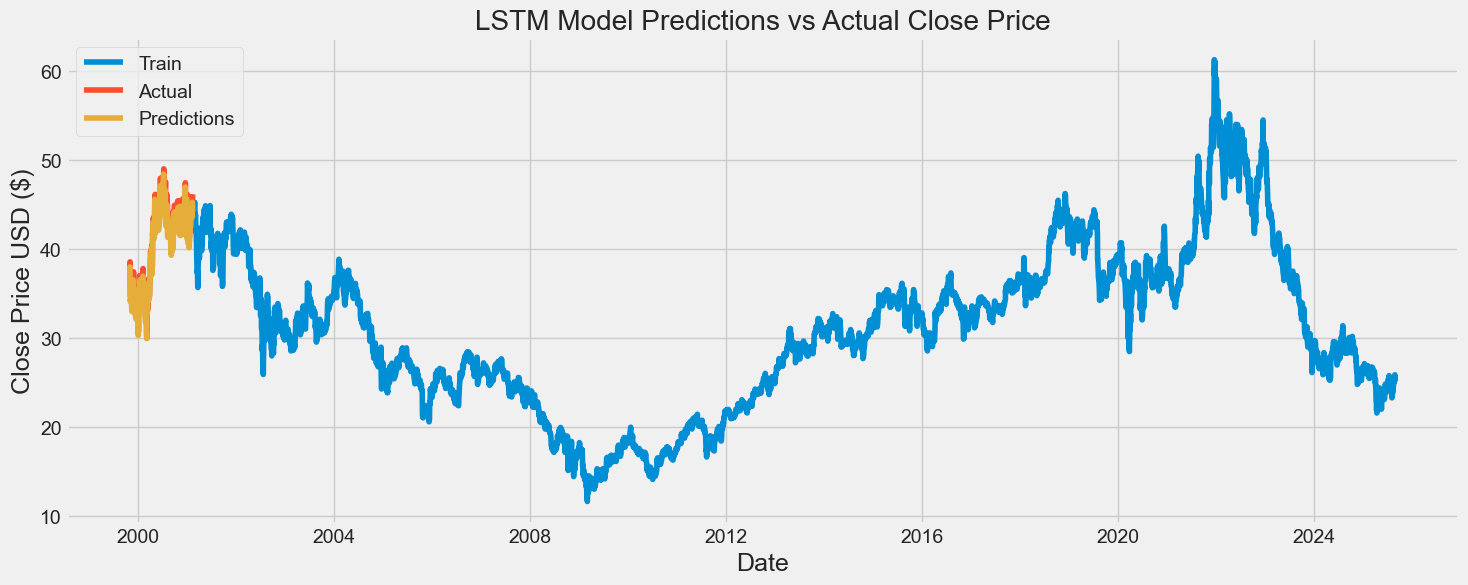

In [ ]:
# Split the dataset into training and validation
train = df[:training_data_len]  # df from Alpha Vantage
valid = df[training_data_len:].copy()  # create a copy to avoid SettingWithCopyWarning

# Add predictions to the validation set
valid['Predictions'] = predictions

# Visualize the results
plt.figure(figsize=(16,6))
plt.title('LSTM Model Predictions vs Actual Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot train data (actual close price)
plt.plot(train['4. close'], label='Train')

# Plot validation data (actual and predicted)
plt.plot(valid['4. close'], label='Actual')
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='upper left')
plt.show()


In [ ]:
# Using your validation data
actual = valid['4. close'].values
predicted = valid['Predictions'].values

# Compute percentage difference
diff = np.abs(predicted - actual) / actual

# Compute percentage accuracy
accuracy = 100 * (1 - np.mean(diff))
print(f"Model Accuracy: {accuracy:.3f}%")


Model Accuracy: 97.596%
